In [34]:
import pandas as pd
import numpy as np
import os, re, sys, tqdm, string, warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action = 'ignore')
pd.set_option('max_columns',500)

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [37]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [40]:
train.describe(include = ['object','float64','int64'])

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82657.000000,77088.000000,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,NaN,NaN,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),"From biodynamic producer Marcel Lapierre, this...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,NaN,NaN,25736,3334,7503,175,10587
mean,NaN,NaN,NaN,NaN,NaN,88.544564,36.922232,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.099649,43.698346,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,88.000000,27.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


In [41]:
test.describe(include = ['object','float64','int64'])

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
count,15927,20661,20665,20665,14676,20665.000000,19271.000000,20661,17351,8914,20665
unique,14,38,20298,20350,9619,NaN,NaN,272,758,17,7922
top,@vossroger,US,Domaine Vacheron 2015 Sancerre,Green and invigorating peppery tones accent th...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Testarossa
freq,4432,9580,3,2,350,NaN,NaN,6325,824,1844,42
mean,NaN,NaN,NaN,NaN,NaN,88.524897,36.217166,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.055695,39.362644,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,86.000000,17.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,88.000000,27.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

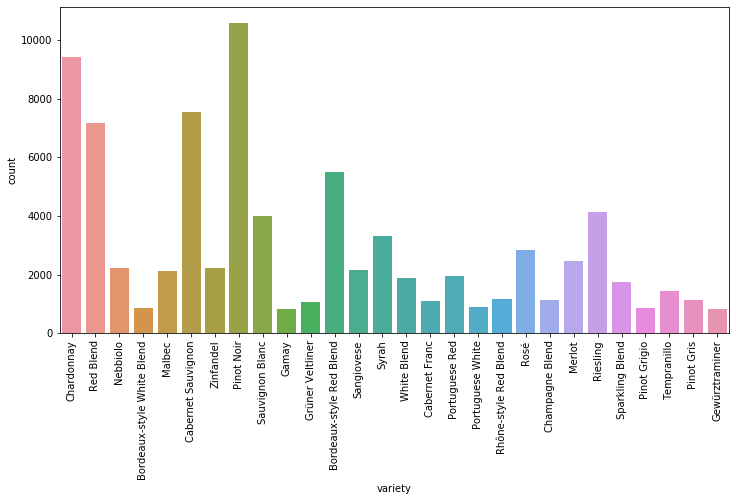

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(train.variety)
plt.xticks(rotation = 90)

## Cleaning Duplicate values

In [43]:
print(f"Train duplicate :\n{train.duplicated().value_counts()}\nTest duplicate :\n{test.duplicated().value_counts()}")
df = train.drop_duplicates(keep='first').append(test.drop_duplicates(keep='first'))
print(f"\nDuplicate values between train and test set :\n{df.duplicated().value_counts()}")

Train duplicate :
False    77641
True      5016
dtype: int64
Test duplicate :
False    20351
True       314
dtype: int64

Duplicate values between train and test set :
False    97992
dtype: int64


No duplicate entries are present between train and test set. Therefore deleting duplicate values in train set and we can't delete test set duplicate values. Therefore storing all test set duplicate rows in a variable named "duplicate". We can check in final prediction of these index values

In [44]:
train.drop_duplicates(inplace=True)
train.reset_index(drop = True, inplace = True)

duplicate = test.duplicated().index

In [45]:
df = train.append(test, sort= False).reset_index(drop = True)

In [46]:
df.duplicated().value_counts()

False    97992
True       314
dtype: int64

Here 314 duplicate values are those values which are present under test set

In [47]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98306 entries, 0 to 98305
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           75032 non-null  object 
 1   country             98269 non-null  object 
 2   review_title        98306 non-null  object 
 3   review_description  98306 non-null  object 
 4   designation         70134 non-null  object 
 5   points              98306 non-null  int64  
 6   price               91627 non-null  float64
 7   province            98269 non-null  object 
 8   region_1            83031 non-null  object 
 9   region_2            42728 non-null  object 
 10  winery              98306 non-null  object 
 11  variety             77641 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.0+ MB


# ANALYSIS

In [49]:
df.shape

(98306, 12)

In [50]:
for c in df.columns :
    print(f"Unique entry for column {c} :\t\t{df[c].nunique()}")

Unique entry for column user_name :		15
Unique entry for column country :		40
Unique entry for column review_title :		94482
Unique entry for column review_description :		95434
Unique entry for column designation :		30309
Unique entry for column points :		21
Unique entry for column price :		366
Unique entry for column province :		370
Unique entry for column region_1 :		1056
Unique entry for column region_2 :		17
Unique entry for column winery :		14728
Unique entry for column variety :		28


# BASELINE 

In [18]:
num_col = ['points', 'price']
cat_col = [c for c in df.columns[:-1] if c not in num_col]

In [19]:
for c in df.columns[:-1]:
    if df['user_name'].values.dtype == 'O' :
        df[c].fillna(df[c].mode()[0], inplace = True)
    else :
        df[c].fillna(df[c].median(), inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
for c in cat_col:
    le = LabelEncoder()
    df[c] = pd.DataFrame(le.fit_transform(df[c]), columns = [c])

In [21]:
train.shape, test.shape

((77641, 12), (20665, 11))

In [22]:
train = df[df.variety.notnull()].reset_index(drop = True)
test = df[df.variety.isnull()].reset_index(drop = True)

label = train.variety
del train['variety']
del test['variety']

In [23]:
train.shape , test.shape, label.shape

((77641, 11), (20665, 11), (77641,))

# ML

In [24]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.utils import shuffle

In [29]:
def folds(train, label, model, xg_boost = None, lg_boost = None, param = None, testset = None):
    list_test = []
    predicted = pd.DataFrame(np.zeros(shape = (len(label))))
    predicted_prob = pd.DataFrame(np.zeros(shape=(len(label),28)))
    
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=492)
    for t_ind, v_ind in kfold.split(train.values, label):
        xtrain , ytrain = train.loc[t_ind,:], label[t_ind]
        xval , yval = train.loc[v_ind,:], label[v_ind]
        
        if xg_boost is not None :
            training = xgb.DMatrix(xtrain, ytrain)
            testing = xgb.DMatrix(xval, yval)
            model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                             num_boost_round = 1500, early_stopping_rounds = 200, verbose_eval = 5)
            predicted_prob.loc[v_ind,'Answer'] = model.predict(testing, ntree_limit= model.best_ntree_limit)
            list_test.append(model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit))
        
        elif lg_boost is not None :
            training = lgb.Dataset(xtrain, ytrain)
            testing = lgb.Dataset(xval, yval, reference=training)
            model = lgb.train(param , training, valid_sets = [training,testing],
                             num_boost_round = 1500, early_stopping_rounds = 200, verbose_eval = 5)
            predicted_prob.loc[v_ind,:] = model.predict(xval, best_iteration= model.best_iteration)
            list_test.append(model.predict(testset, best_iteration = model.best_iteration))
        
        else :
            model.fit(xtrain, ytrain)
            predicted.loc[v_ind,0] = model.predict(xval)
            list_test.append(model.predict(testset))

    if xg_boost is not None or lg_boost is not None :
        print('Confusion Matrix Report:\n%s' %(confusion_matrix(np.argmax(predicted_prob.values,1),label)))
        print('Classification Report:\n%s'  %(classification_report(np.argmax(predicted_prob.values,1),label)))
        print('F1 Score : %s' %(f1_score(np.argmax(predicted_prob.values,1), label, average='weighted')))
        
        if xg_boost is not None:
            xgb.plot_importance(model)
        else:
            lgb.plot_importance(model)
        
    else :
        print('Confusion Matrix Report:\n%s' %(confusion_matrix(predicted,label)))
        print('Classification Report:\n%s' %(classification_report(predicted,label)))
        print('F1 Score : %s' %(f1_score(predicted, label, average='weighted')))
    
    value = le.inverse_transform(pd.DataFrame(np.mean(list_test,0).round())[0].astype('int'))
    return(value)

In [26]:
gb_ovo = folds(train, label, GradientBoostingClassifier(verbose = 1, random_state = 31), testset = test)

      Iter       Train Loss   Remaining Time 
         1      167631.2719           12.88m
         2      159082.9393           12.71m
         3      151541.3017           13.10m
         4      146446.7830           13.05m
         5      141834.1453           13.11m
         6      137993.2612           13.00m
         7      134996.1444           12.79m
         8      132425.7126           12.59m
         9      129933.5014           12.37m
        10      128025.9188           12.20m
        20      115446.4217           10.63m
        30      109294.8118            9.25m
        40      105263.3876            7.88m
        50      102112.5355            6.55m
        60       99543.5539            5.23m
        70       97435.0174            3.92m
        80       97127.2769            2.61m
        90       95576.8313            1.30m
       100       94141.6544            0.00s
      Iter       Train Loss   Remaining Time 
         1      167417.8646           12.52m
        

KeyboardInterrupt: 

Training until validation scores don't improve for 200 rounds
[5]	training's multi_logloss: 2.01093	valid_1's multi_logloss: 2.04823
[10]	training's multi_logloss: 1.74139	valid_1's multi_logloss: 1.79698
[15]	training's multi_logloss: 1.58298	valid_1's multi_logloss: 1.65419
[20]	training's multi_logloss: 1.47529	valid_1's multi_logloss: 1.56224
[25]	training's multi_logloss: 1.39579	valid_1's multi_logloss: 1.49932
[30]	training's multi_logloss: 1.33386	valid_1's multi_logloss: 1.45244
[35]	training's multi_logloss: 1.28317	valid_1's multi_logloss: 1.41702
[40]	training's multi_logloss: 1.2401	valid_1's multi_logloss: 1.38977
[45]	training's multi_logloss: 1.20327	valid_1's multi_logloss: 1.36822
[50]	training's multi_logloss: 1.17113	valid_1's multi_logloss: 1.35083
[55]	training's multi_logloss: 1.1427	valid_1's multi_logloss: 1.33714
[60]	training's multi_logloss: 1.11742	valid_1's multi_logloss: 1.32597
[65]	training's multi_logloss: 1.09397	valid_1's multi_logloss: 1.3165
[70]	t

[50]	training's multi_logloss: 1.16723	valid_1's multi_logloss: 1.36535
[55]	training's multi_logloss: 1.13899	valid_1's multi_logloss: 1.35187
[60]	training's multi_logloss: 1.11373	valid_1's multi_logloss: 1.33992
[65]	training's multi_logloss: 1.09002	valid_1's multi_logloss: 1.33007
[70]	training's multi_logloss: 1.06968	valid_1's multi_logloss: 1.32368
[75]	training's multi_logloss: 1.04984	valid_1's multi_logloss: 1.31597
[80]	training's multi_logloss: 1.03151	valid_1's multi_logloss: 1.31018
[85]	training's multi_logloss: 1.01415	valid_1's multi_logloss: 1.30486
[90]	training's multi_logloss: 0.997443	valid_1's multi_logloss: 1.30025
[95]	training's multi_logloss: 0.981902	valid_1's multi_logloss: 1.29625
[100]	training's multi_logloss: 0.966899	valid_1's multi_logloss: 1.29239
[105]	training's multi_logloss: 0.952492	valid_1's multi_logloss: 1.28872
[110]	training's multi_logloss: 0.939002	valid_1's multi_logloss: 1.28575
[115]	training's multi_logloss: 0.926178	valid_1's multi

[130]	training's multi_logloss: 0.882559	valid_1's multi_logloss: 1.29723
[135]	training's multi_logloss: 0.87117	valid_1's multi_logloss: 1.29531
[140]	training's multi_logloss: 0.85998	valid_1's multi_logloss: 1.29341
[145]	training's multi_logloss: 0.849683	valid_1's multi_logloss: 1.29177
[150]	training's multi_logloss: 0.839285	valid_1's multi_logloss: 1.29047
[155]	training's multi_logloss: 0.829119	valid_1's multi_logloss: 1.28917
[160]	training's multi_logloss: 0.819346	valid_1's multi_logloss: 1.28761
[165]	training's multi_logloss: 0.809623	valid_1's multi_logloss: 1.28611
[170]	training's multi_logloss: 0.799717	valid_1's multi_logloss: 1.28516
[175]	training's multi_logloss: 0.790133	valid_1's multi_logloss: 1.2836
[180]	training's multi_logloss: 0.780924	valid_1's multi_logloss: 1.28307
[185]	training's multi_logloss: 0.772237	valid_1's multi_logloss: 1.28232
[190]	training's multi_logloss: 0.763411	valid_1's multi_logloss: 1.28178
[195]	training's multi_logloss: 0.754801	

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      4768
           1       0.72      0.81      0.76       721
           2       0.24      0.39      0.30       644
           3       0.60      0.47      0.52      9190
           4       0.86      0.84      0.85      1105
           5       0.48      0.48      0.48      8877
           6       0.95      0.95      0.95       754
           7       0.24      0.35      0.28       535
           8       0.75      0.69      0.72      1059
           9       0.66      0.55      0.60      2389
          10       0.09      0.22      0.13       935
          11       0.97      0.98      0.98      2081
          12       0.48      0.56      0.52       702
          13       0.27      0.37      0.31       781
          14       0.75      0.67      0.71     11183
          15       0.86      0.73      0.79      2167
          16       0.44      0.52      0.47       709
    

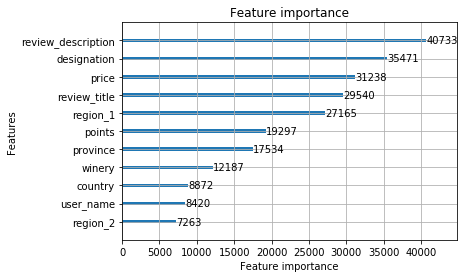

In [33]:
%%time
param = dict()
param['objective'] = 'multiclass'
param['num_class'] = 28
param['metric'] = 'multi_logloss'
param['seed'] = 20
param['learning_rate'] = 0.1
le = LabelEncoder()
lg_ans = folds(train, le.fit_transform(label.values), lgb, lg_boost = True, param = param, testset = test)

BASELINE MODEL: F1_score = 0.60902
Dropped Duplicate values and filled all missing values with mode and median and built final model with LGBM